In [2]:
import numpy as np
import nibabel as nib
import glob
#from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
from sklearn.preprocessing import MinMaxScaler
import random
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

2023-05-06 21:47:38.210990: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
train_path = 'BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'

In [4]:
test_image_flair = nib.load(train_path + '/BraTS20_Training_057/BraTS20_Training_057_flair.nii').get_fdata()
print(test_image_flair.max())
scaler = MinMaxScaler()
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)
print(test_image_flair.max())


test_image_t1ce = nib.load(train_path + '/BraTS20_Training_057/BraTS20_Training_057_t1ce.nii').get_fdata()

test_image_t1ce = scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)


test_image_t2 = nib.load(train_path + '/BraTS20_Training_057/BraTS20_Training_057_t2.nii').get_fdata()

test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

697.0
1.0


In [5]:
test_mask=nib.load(train_path + '/BraTS20_Training_057/BraTS20_Training_057_seg.nii').get_fdata()
test_mask=test_mask.astype(np.uint8)

print(np.unique(test_mask))  

# Since the label 3 is missing, we need to reassign 4 to 3
test_mask[test_mask==4] = 3 
print(np.unique(test_mask)) 

[0 1 2 4]
[0 1 2 3]


Text(0.5, 1.0, 'mask')

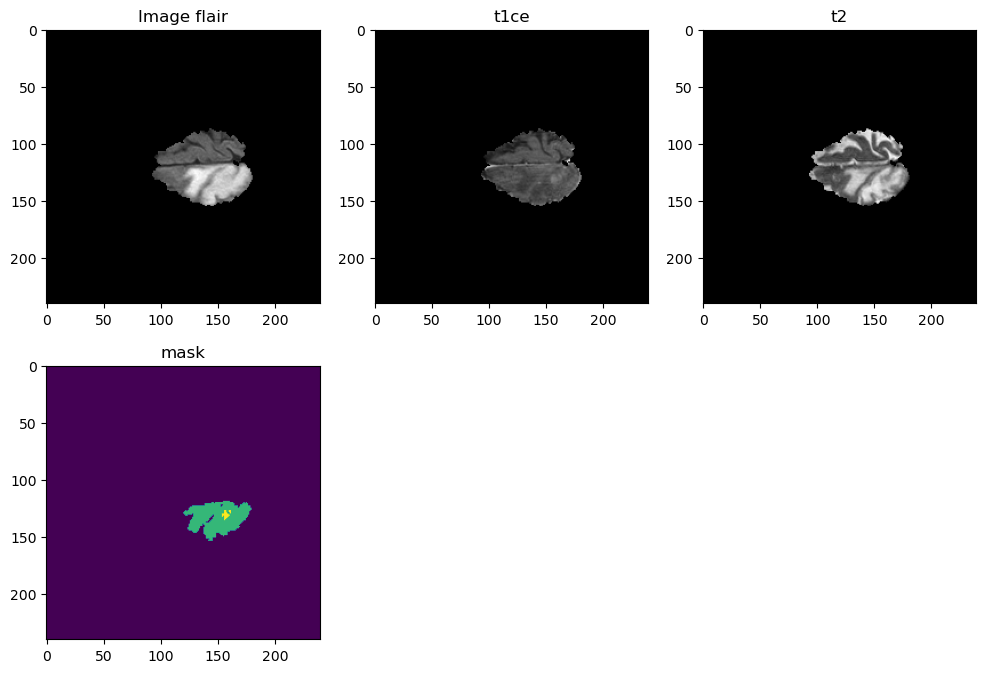

In [6]:
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')

plt.subplot(232)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('t1ce')

plt.subplot(233)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('t2')

plt.subplot(234)
plt.imshow(test_mask[:,:,n_slice])
plt.title('mask')

In [9]:
# Group each type of images together into list
t1ce_imgs = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
t2_imgs = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
flair_imgs = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_imgs = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))
num_imgs = len(t1ce_imgs)
print(num_imgs)

369


In [12]:
for i in range(num_imgs):
    
    # Load matched data using Nifti library
    t1ce = nib.load(t1ce_imgs[i]).get_fdata()
    t2 = nib.load(t2_imgs[i]).get_fdata()
    flair = nib.load(flair_imgs[i]).get_fdata()
    masks = nib.load(mask_imgs[i]).get_fdata()
    
    # Scale
    t1ce = scaler.fit_transform(t1ce.reshape(-1, t1ce.shape[-1])).reshape(t1ce.shape)
    t2 = scaler.fit_transform(t2.reshape(-1, t2.shape[-1])).reshape(t2.shape)
    flair = scaler.fit_transform(flair.reshape(-1, flair.shape[-1])).reshape(flair.shape)
    
    # Assign Numpy type and change label 4 to 3 since label 3 is missing
    masks = masks.astype(np.uint8)
    masks[masks == 4] = 3
    
    # Combine t1ce, tw, flair and discard any files that are unuseful
    imgs = np.stack([flair, t1ce, t2], axis = 3)
    imgs = imgs[56:184, 56:184, 13:141]
    masks = masks[56:184, 56:184, 13:141]
    label_in_img = np.unique(masks, return_counts = True)[0]
    label_count = np.unique(masks, return_counts = True)[1]
    total_count = label_count.sum()
    useful_label_percent = 1 - (label_count[0] / total_count)
    
    if useful_label_percent < 0.01:
        print("Training Set" + str(i) + "Discarded")
    else:
        mask = to_categorical(masks, num_classes = 4)
        np.save('BraTS2020_TrainingData/processed_imgs/train_set_' + str(i) + '.npy', imgs)
        np.save('BraTS2020_TrainingData/processed_masks/mask_' + str(i) + '.npy', masks)
        print(str(i) + "saved")
    
    

0saved
1saved
2saved
3saved
Training Set4Discarded
5saved
6saved
7saved
8saved
9saved
10saved
11saved
12saved
13saved
14saved
15saved
16saved
17saved
18saved
19saved
20saved
21saved
22saved
23saved
24saved
25saved
26saved
Training Set27Discarded
28saved
29saved
30saved
31saved
32saved
33saved
34saved
Training Set35Discarded
36saved
37saved
38saved
39saved
40saved
41saved
42saved
Training Set43Discarded
44saved
45saved
46saved
47saved
48saved
49saved
50saved
51saved
52saved
53saved
54saved
55saved
56saved
57saved
58saved
59saved
Training Set60Discarded
61saved
Training Set62Discarded
63saved
64saved
65saved
66saved
67saved
68saved
69saved
70saved
71saved
72saved
73saved
74saved
75saved
76saved
77saved
Training Set78Discarded
79saved
80saved
Training Set81Discarded
82saved
83saved
84saved
Training Set85Discarded
86saved
87saved
88saved
89saved
90saved
91saved
92saved
93saved
94saved
95saved
96saved
97saved
Training Set98Discarded
99saved
100saved
101saved
102saved
103saved
104saved
105sa